In [3]:
from google.colab import files


uploaded = files.upload()


Saving Index to Index
Saving wine.data to wine.data
Saving wine.names to wine.names


In [4]:
import pandas as pd

columns = [
    'Class label',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315',
    'Proline'
]

df = pd.read_csv('wine.data', header=None, names=columns)
df.head()


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


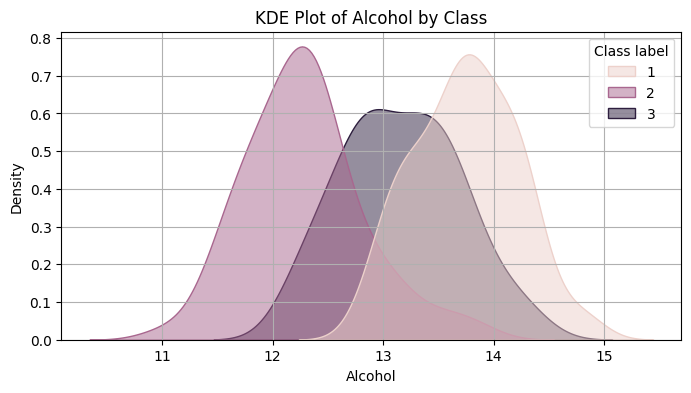

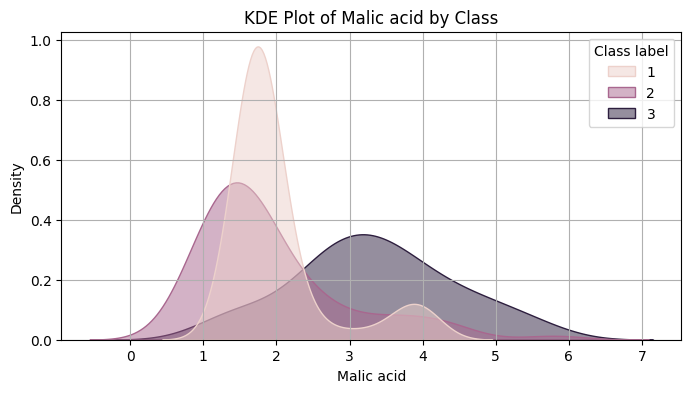

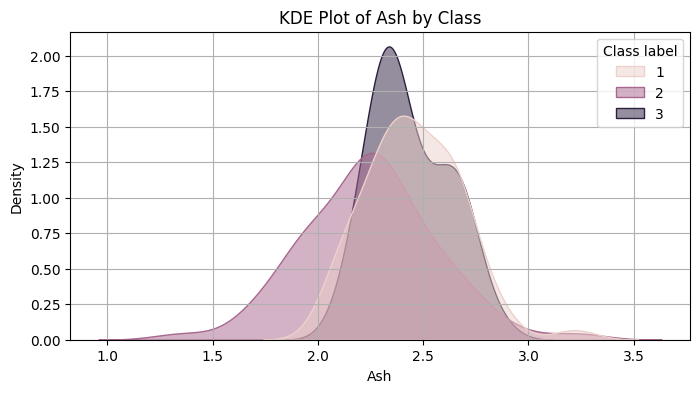

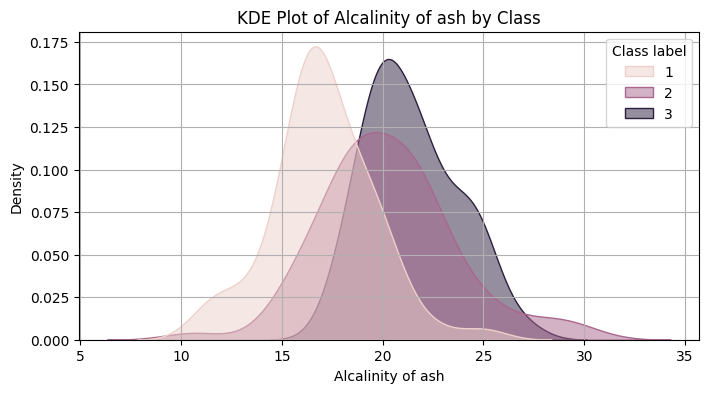

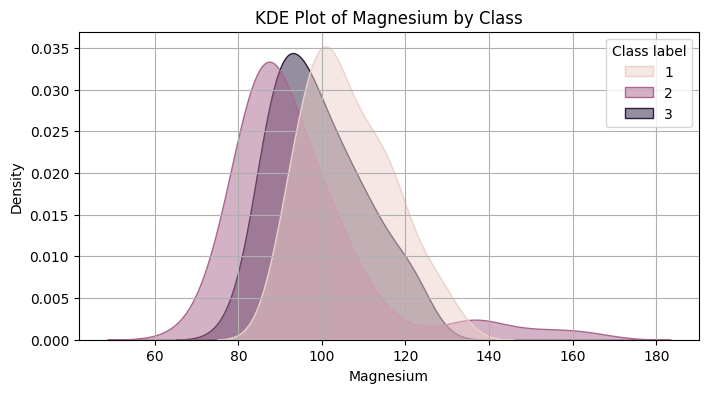

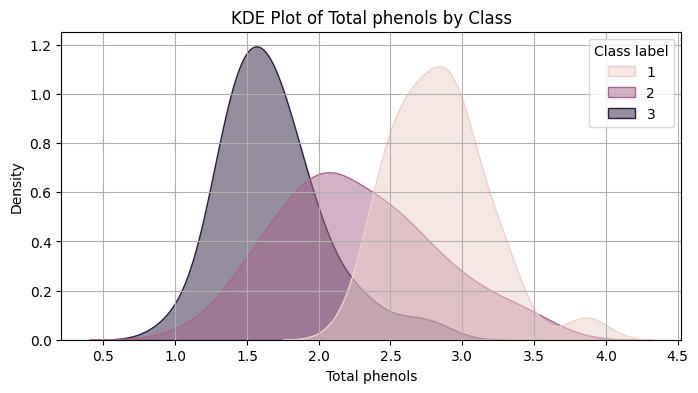

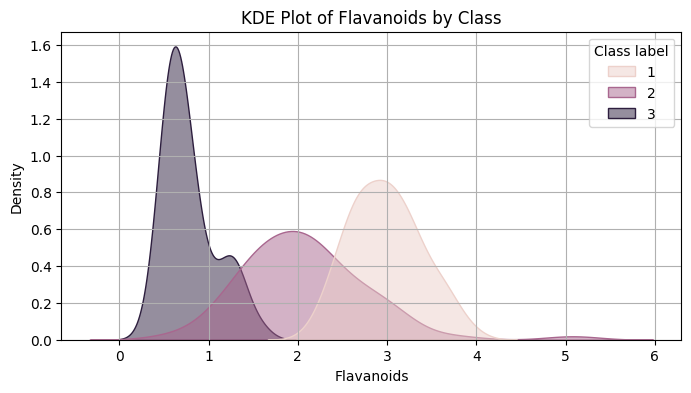

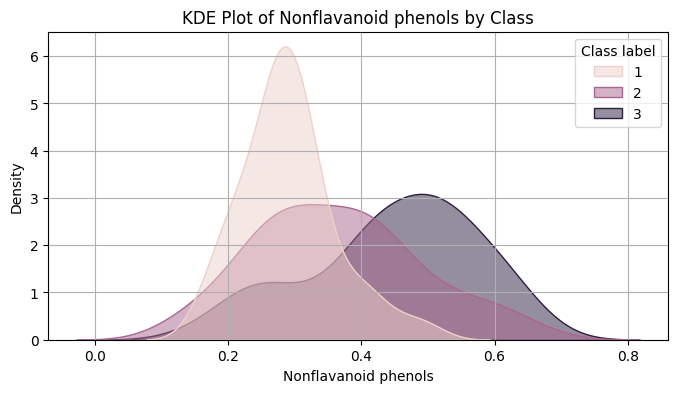

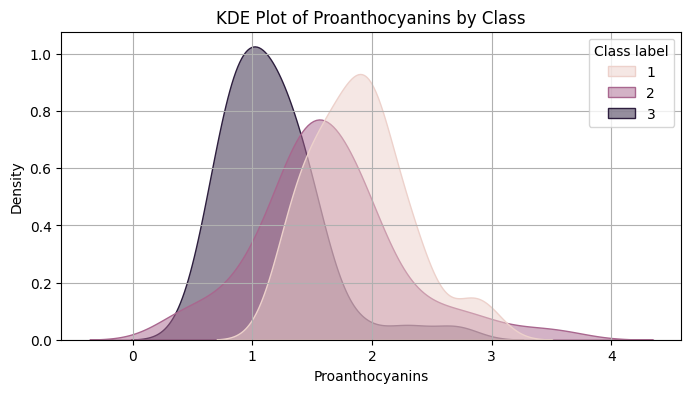

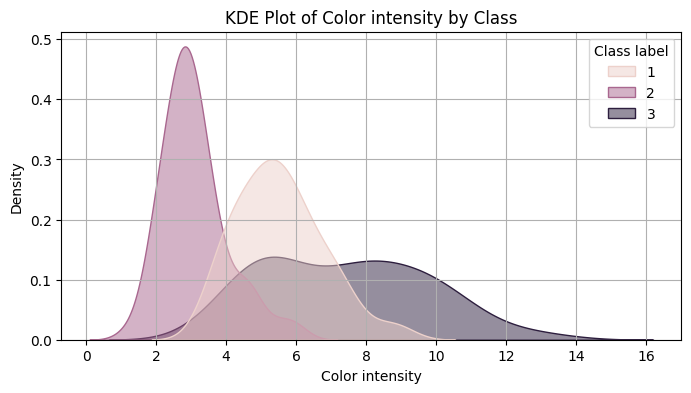

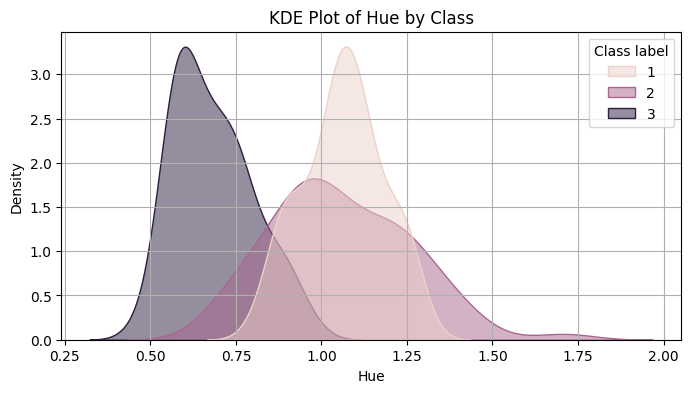

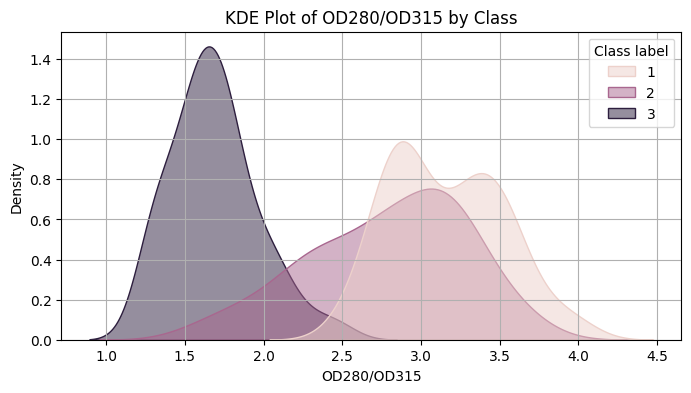

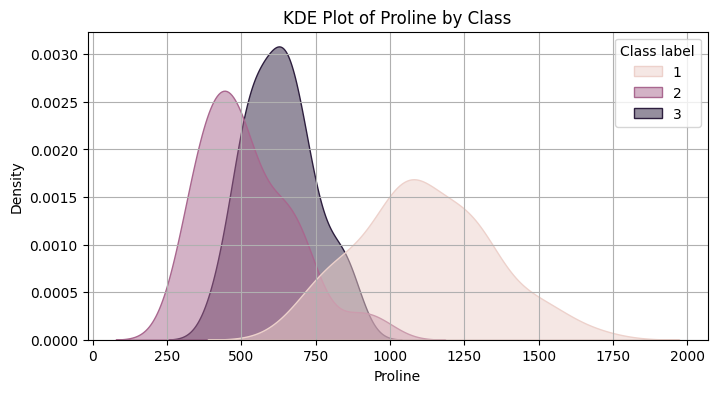

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = df.columns[1:]

for feature in feature_names:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=feature, hue="Class label", fill=True, common_norm=False, alpha=0.5)
    plt.title(f"KDE Plot of {feature} by Class")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()


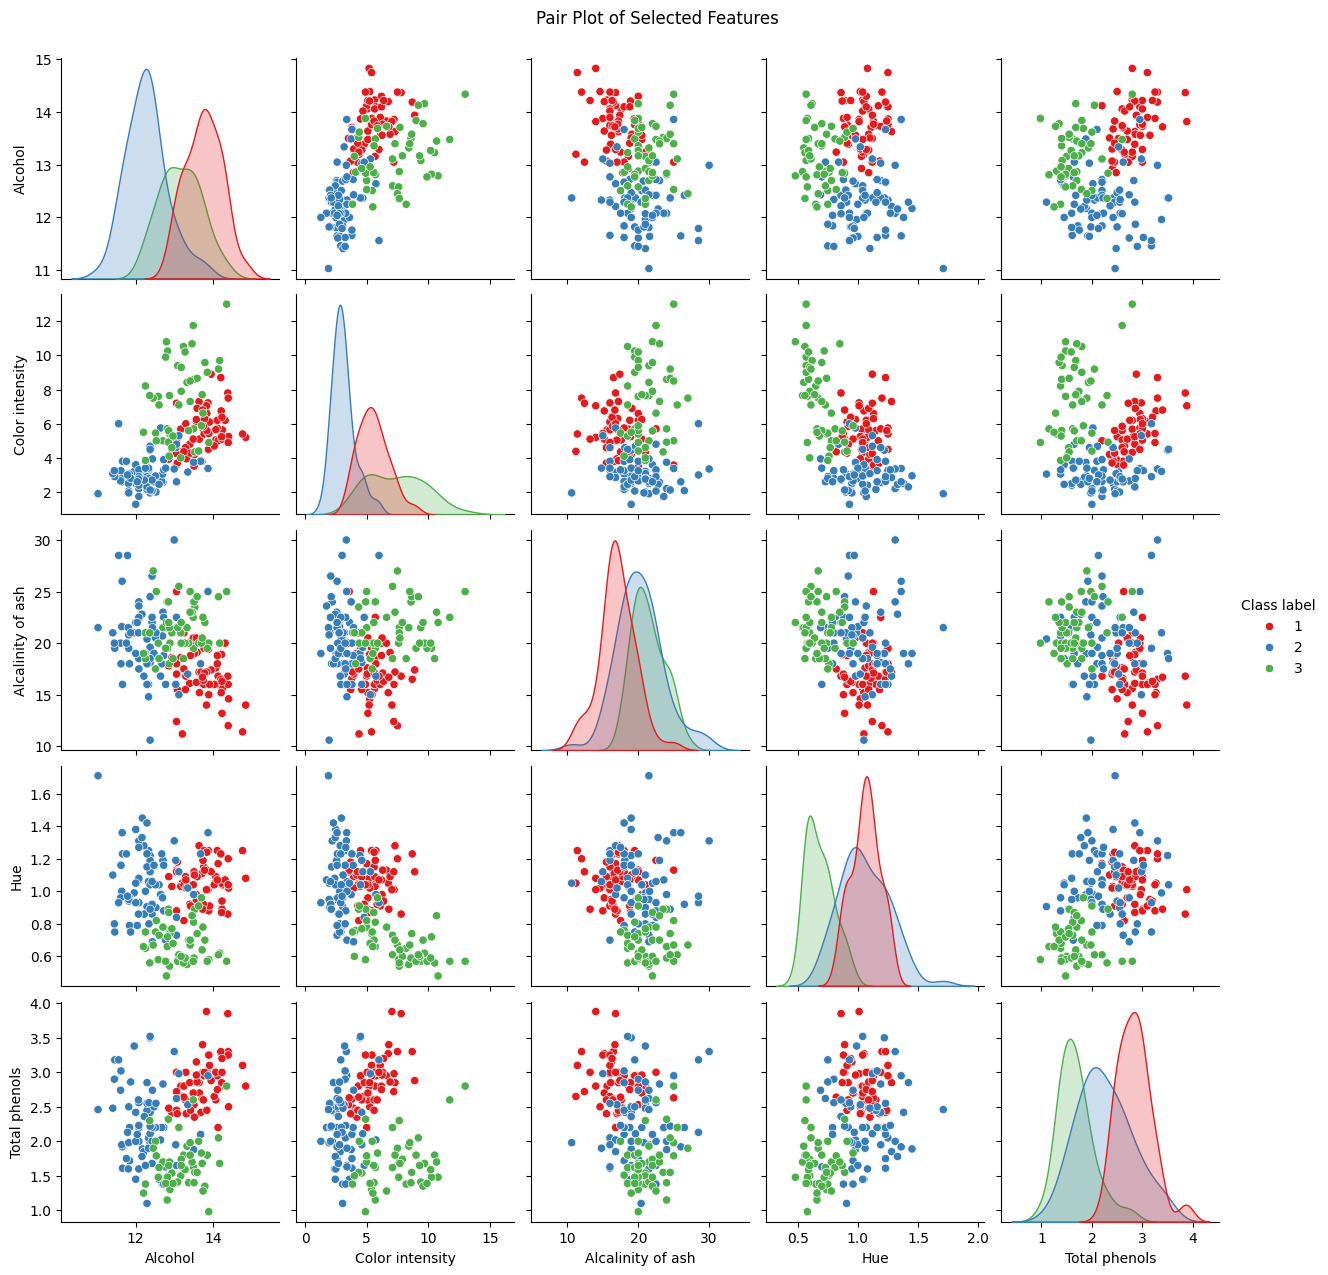

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


selected_features = ['Alcohol', 'Color intensity', 'Alcalinity of ash', 'Hue', 'Total phenols']


df["Class label"] = df["Class label"].astype(str)


sns.pairplot(df[selected_features + ['Class label']], hue="Class label", palette="Set1")
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()


In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


X = df.drop("Class label", axis=1)
y = df["Class label"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [12]:
import numpy as np
from collections import Counter


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))


class KNN:
    def __init__(self, k=3, distance_metric="euclidean"):
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X, y):
        self.X_train = X
        self.y_train = np.array(y)

    def _compute_distance(self, x1, x2):
        if self.distance_metric == "euclidean":
            return euclidean_distance(x1, x2)
        elif self.distance_metric == "manhattan":
            return manhattan_distance(x1, x2)
        else:
            raise ValueError("Unsupported distance metric")

    def _predict_single(self, x):
        distances = [self._compute_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])


euclidean - k=1 -> Accuracy: 0.9722
euclidean - k=3 -> Accuracy: 0.9722
euclidean - k=5 -> Accuracy: 1.0000
euclidean - k=7 -> Accuracy: 1.0000
euclidean - k=9 -> Accuracy: 0.9722
euclidean - k=11 -> Accuracy: 0.9722
euclidean - k=13 -> Accuracy: 1.0000
manhattan - k=1 -> Accuracy: 0.9444
manhattan - k=3 -> Accuracy: 0.9722
manhattan - k=5 -> Accuracy: 0.9722
manhattan - k=7 -> Accuracy: 1.0000
manhattan - k=9 -> Accuracy: 1.0000
manhattan - k=11 -> Accuracy: 0.9722
manhattan - k=13 -> Accuracy: 0.9722


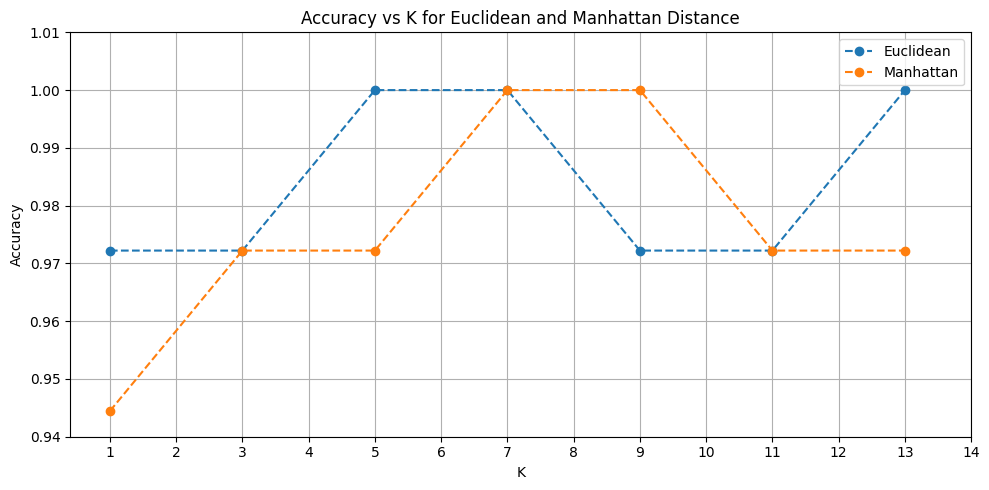

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

k_values = [1, 3, 5, 7, 9, 11, 13]
x_ticks = list(range(1, 14 + 1))

distance_metrics = ["euclidean", "manhattan"]

plt.figure(figsize=(10, 5))

for metric in distance_metrics:
    accuracies = []
    for k in k_values:
        model = KNN(k=k, distance_metric=metric)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
        print(f"{metric} - k={k} -> Accuracy: {acc:.4f}")

    plt.plot(k_values, accuracies, marker='o', linestyle='--', label=metric.capitalize())


plt.xticks(x_ticks)

plt.title("Accuracy vs K for Euclidean and Manhattan Distance")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.ylim(0.94, 1.01)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



===== Distance Metric: EUCLIDEAN =====



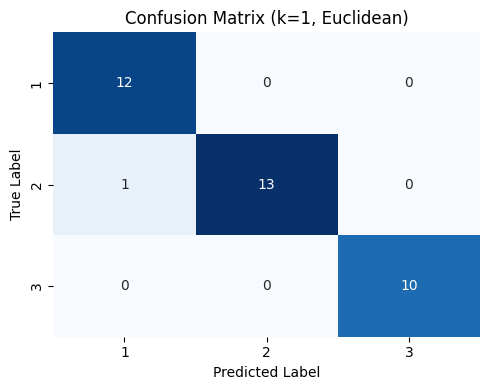

Classification Report (k=1, Euclidean):

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

------------------------------------------------------------


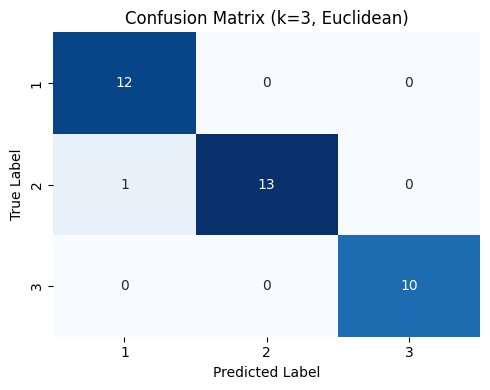

Classification Report (k=3, Euclidean):

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

------------------------------------------------------------


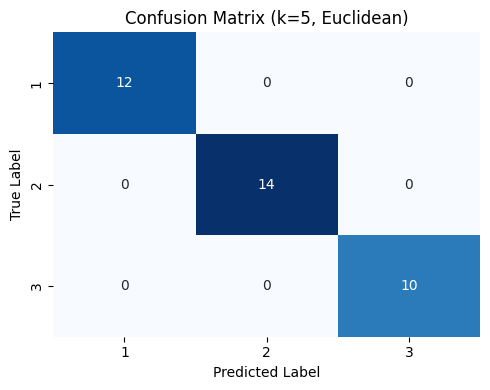

Classification Report (k=5, Euclidean):

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

------------------------------------------------------------


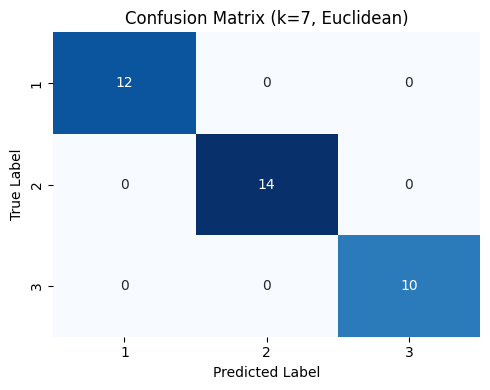

Classification Report (k=7, Euclidean):

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

------------------------------------------------------------


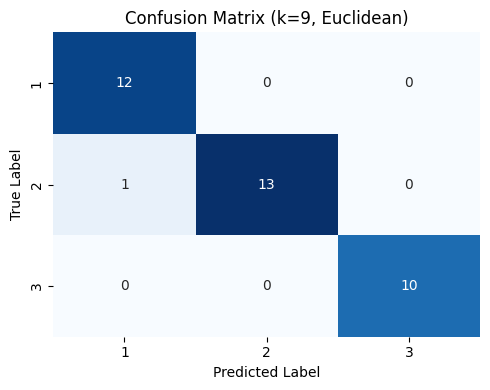

Classification Report (k=9, Euclidean):

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

------------------------------------------------------------


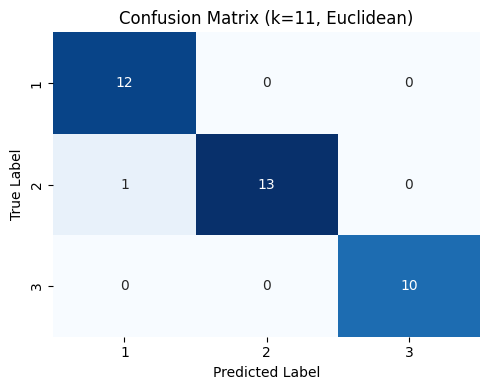

Classification Report (k=11, Euclidean):

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

------------------------------------------------------------


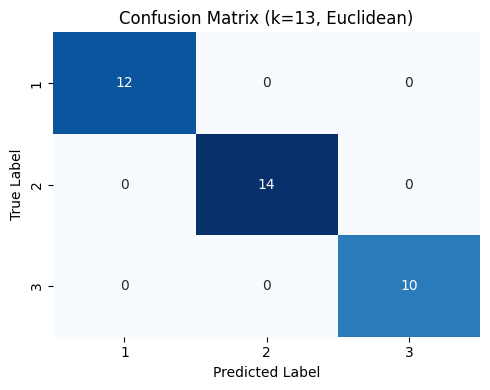

Classification Report (k=13, Euclidean):

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

------------------------------------------------------------

===== Distance Metric: MANHATTAN =====



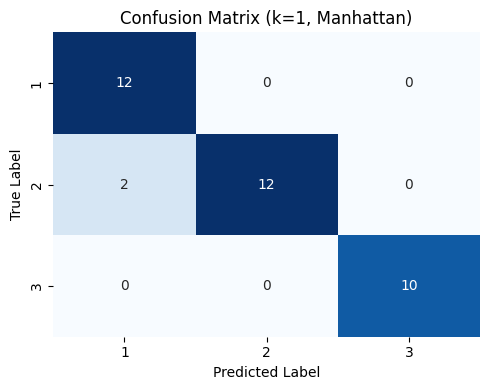

Classification Report (k=1, Manhattan):

              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36

------------------------------------------------------------


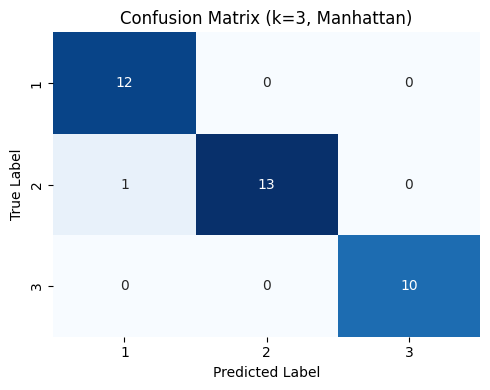

Classification Report (k=3, Manhattan):

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

------------------------------------------------------------


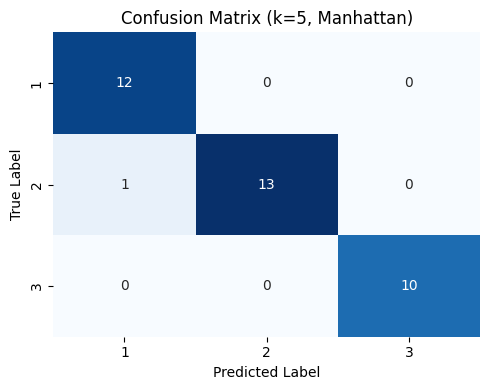

Classification Report (k=5, Manhattan):

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

------------------------------------------------------------


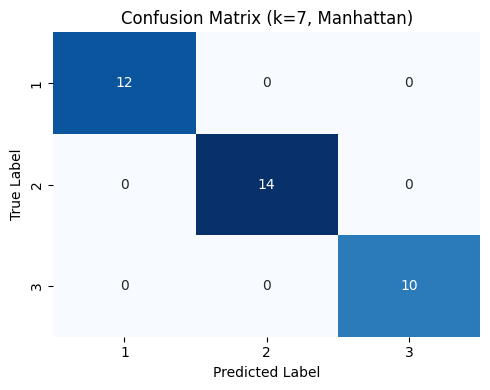

Classification Report (k=7, Manhattan):

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

------------------------------------------------------------


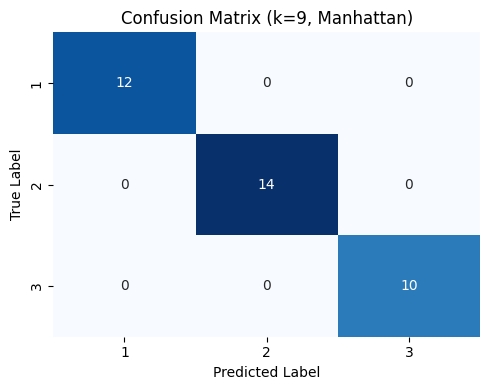

Classification Report (k=9, Manhattan):

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

------------------------------------------------------------


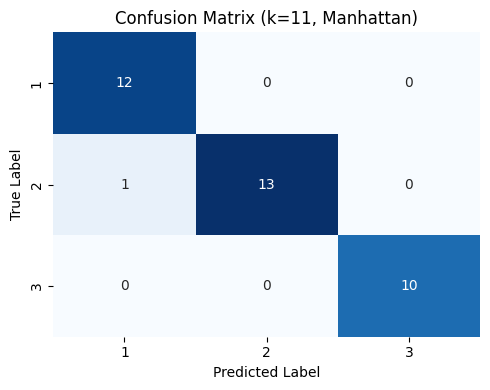

Classification Report (k=11, Manhattan):

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

------------------------------------------------------------


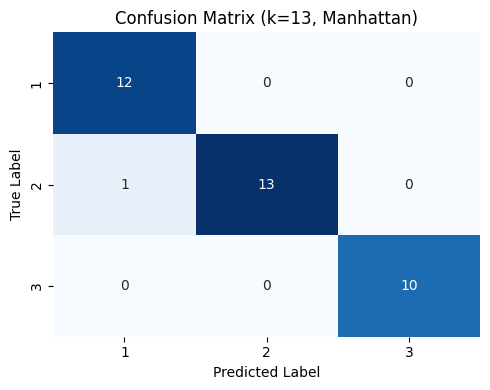

Classification Report (k=13, Manhattan):

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

------------------------------------------------------------


In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

k_values = [1, 3, 5, 7, 9, 11, 13]
distance_metrics = ['euclidean', 'manhattan']
class_labels = sorted(y.unique())  # 1, 2, 3

for metric in distance_metrics:
    print(f"\n===== Distance Metric: {metric.upper()} =====\n")
    for k in k_values:

        model = KNN(k=k, distance_metric=metric)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)


        cm = confusion_matrix(y_test, y_pred, labels=class_labels)


        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=class_labels, yticklabels=class_labels)
        plt.title(f'Confusion Matrix (k={k}, {metric.capitalize()})')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.tight_layout()
        plt.show()


        print(f"Classification Report (k={k}, {metric.capitalize()}):\n")
        print(classification_report(y_test, y_pred, digits=2))
        print("-" * 60)


In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline'
]

df = pd.read_csv('wine.data', header=None, names=columns)


X = df.drop("Class label", axis=1)
y = df["Class label"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))


class KNN:
    def __init__(self, k=3, distance_metric="euclidean"):
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X, y):
        self.X_train = X
        self.y_train = np.array(y)

    def _compute_distance(self, x1, x2):
        if self.distance_metric == "euclidean":
            return euclidean_distance(x1, x2)
        elif self.distance_metric == "manhattan":
            return manhattan_distance(x1, x2)
        else:
            raise ValueError("Unsupported distance metric")

    def _predict_single(self, x):
        distances = [self._compute_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])


k_values = [1, 3, 5, 7, 9, 11, 13]
distance_metrics = ["euclidean", "manhattan"]

plt.figure(figsize=(12, 6))

for metric in distance_metrics:
    accuracies = []
    for k in k_values:
        model = KNN(k=k, distance_metric=metric)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
        print(f"{metric.capitalize()} - k={k} -> Accuracy: {acc:.4f}")


    plt.plot(k_values, accuracies, marker='o', linestyle='--', label=metric.capitalize())
    for k, acc in zip(k_values, accuracies):
        plt.text(k, acc + 0.003, f"{acc:.2f}", ha='center', fontsize=9)


plt.title("Accuracy vs K for Euclidean and Manhattan Distance")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(range(1, 14 + 1))
plt.ylim(0.94, 1.01)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


class_labels = sorted(y.unique())

for metric in distance_metrics:
    print(f"\n===== Distance Metric: {metric.upper()} =====\n")
    for k in k_values:
        model = KNN(k=k, distance_metric=metric)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)


        cm = confusion_matrix(y_test, y_pred, labels=class_labels)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_labels, yticklabels=class_labels, cbar=False)
        plt.title(f'Confusion Matrix (k={k}, {metric.capitalize()})')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.tight_layout()
        plt.show()


        print(f"Classification Report (k={k}, {metric.capitalize()}):\n")
        print(classification_report(y_test, y_pred, digits=2))
        print("-" * 60)


In [20]:
code = '''
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

class KNN:
    def __init__(self, k=3, distance_metric="euclidean"):
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X, y):
        self.X_train = X
        self.y_train = np.array(y)

    def _compute_distance(self, x1, x2):
        if self.distance_metric == "euclidean":
            return euclidean_distance(x1, x2)
        elif self.distance_metric == "manhattan":
            return manhattan_distance(x1, x2)
        else:
            raise ValueError("Unsupported distance metric")

    def _predict_single(self, x):
        distances = [self._compute_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])
'''

with open('knn.py', 'w') as f:
    f.write(code)


In [26]:
from google.colab import files
files.download('knn.py')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
readme = '''
# k-NN Wine Dataset Classifier

This project implements a **k-Nearest Neighbors (k-NN)** classifier from scratch using Python, applied to the well-known **Wine dataset**. The model is evaluated using different values of **k** and three distance metrics: **Euclidean**, **Manhattan**, and **Chebyshev** (optional).

- `knn.py`: Custom implementation of the k-NN algorithm with support for different distance metrics.
- `analysis.ipynb`: Jupyter Notebook containing data analysis, training results, accuracy plots, and confusion matrices. Desired graphs can be drawn by uncommenting the relevant code cells.
- `README.md`: This file — contains project description and instructions.
- `wine.data`, `wine.names`: UCI Wine Dataset files.
- `figures/`: Contains all visual outputs such as accuracy vs k plots and confusion matrices.

The Wine dataset consists of **178 samples**, each with **13 chemical attributes** derived from the analysis of wines grown in the same region in Italy but derived from three different cultivars (classes).

- **Features**: Alcohol, Malic acid, Ash, Magnesium, Flavanoids, Hue, etc.
- **Target Classes**: 1, 2, 3

The dataset used in this project is sourced from **scikit-learn** and matches the UCI Wine dataset.

Setup Instructions

To run the code in **Google Colab**, follow these steps:

1. Mount Google Drive:
   ```python
   from google.colab import drive
   drive.mount('/content/drive')
'''

with open('README.md', 'w') as f:
    f.write(readme)


In [24]:
files.download('README.md')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>